In [63]:
import pandas as pd


In [101]:
df=pd.read_csv('reliance_stock_data.csv')

In [65]:
df.head()

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
0,2005-01-03,354.4090,371.0715,354.4090,370.1173,79.2399,11842921,0.0,1.0
1,2005-01-04,364.5972,371.3782,360.8491,361.7351,77.4453,10059943,0.0,1.0
2,2005-01-05,358.1230,363.9158,351.8194,361.1217,77.3140,16954266,0.0,1.0
3,2005-01-06,357.7824,365.6195,356.1468,358.4297,76.7377,13446517,0.0,1.0
4,2005-01-07,359.8269,373.1159,359.5202,368.5840,78.9116,16969845,0.0,1.0


In [66]:
df.tail()

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
4749,2024-04-12,2955.00,2973.0,2925.70,2935.10,2935.10,677948,0.0,1.0
4750,2024-04-15,2908.65,2964.5,2893.15,2932.90,2932.90,301990,0.0,1.0
4751,2024-04-16,2909.95,2942.0,2902.10,2934.45,2934.45,157052,0.0,1.0
4752,2024-04-18,2929.00,2971.5,2919.00,2928.15,2928.15,205714,0.0,1.0
4753,2024-04-19,2918.95,2947.0,2886.75,2941.60,2941.60,530975,0.0,1.0


In [102]:
df = df[-1654:]

In [88]:
df[1653:1654]

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
1653,2011-09-13,739.8703,751.2655,726.9253,739.1411,335.7168,1849397,0.0,1.0


In [103]:
df1=df.reset_index()['high']

In [104]:
df1

0       1517.8463
1       1516.2055
2       1487.7630
3       1477.7352
4       1476.7323
          ...    
1649    2973.0000
1650    2964.5000
1651    2942.0000
1652    2971.5000
1653    2947.0000
Name: high, Length: 1654, dtype: float64

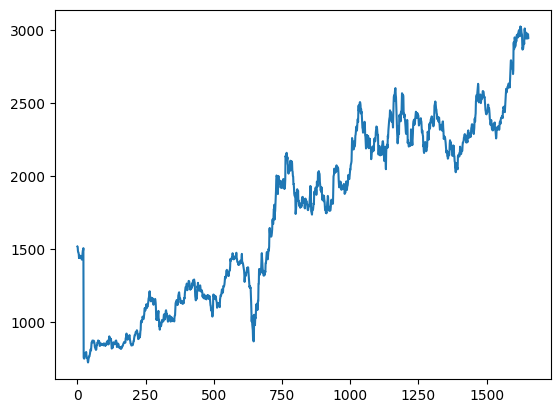

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [9]:
import numpy as np


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [11]:
df1

array([[0.34520985],
       [0.3444969 ],
       [0.33213828],
       ...,
       [0.96402237],
       [0.97684049],
       [0.96619493]])

In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size


(1075, 579)

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)


(974, 100)
(974,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)


(478, 100)
(478,)


(None, None)

In [18]:
X_test

array([[0.64209461, 0.63981698, 0.60501871, ..., 0.68596381, 0.67004019,
        0.65219542],
       [0.63981698, 0.60501871, 0.61456494, ..., 0.67004019, 0.65219542,
        0.66724762],
       [0.60501871, 0.61456494, 0.62525995, ..., 0.65219542, 0.66724762,
        0.6683369 ],
       ...,
       [0.71678478, 0.71026709, 0.72315035, ..., 0.9799907 , 0.97792677,
        0.97749225],
       [0.71026709, 0.72315035, 0.72623543, ..., 0.97792677, 0.97749225,
        0.9737989 ],
       [0.72315035, 0.72623543, 0.72905976, ..., 0.97749225, 0.9737989 ,
        0.96402237]])

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
X_test[0]

array([[0.64209461],
       [0.63981698],
       [0.60501871],
       [0.61456494],
       [0.62525995],
       [0.6284288 ],
       [0.63314252],
       [0.62753757],
       [0.63833156],
       [0.64363943],
       [0.63843058],
       [0.63013209],
       [0.63989619],
       [0.66089006],
       [0.66657422],
       [0.65774097],
       [0.65918677],
       [0.65871145],
       [0.66570276],
       [0.6856073 ],
       [0.69218273],
       [0.70230335],
       [0.7017092 ],
       [0.70083774],
       [0.69246004],
       [0.68041826],
       [0.67673447],
       [0.67758607],
       [0.63183538],
       [0.61874391],
       [0.62541837],
       [0.63886631],
       [0.64449108],
       [0.64047058],
       [0.63696497],
       [0.61636726],
       [0.61923908],
       [0.62048683],
       [0.63104313],
       [0.63532113],
       [0.63001325],
       [0.61812995],
       [0.64585766],
       [0.64904633],
       [0.65789939],
       [0.65853317],
       [0.65092786],
       [0.634

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 414ms/step - loss: 0.0596 - val_loss: 0.0484
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - loss: 0.0046 - val_loss: 0.0071
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 328ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 302ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - loss: 9.6882e-04 - val_loss: 0.0011
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - loss: 8.8835e-04 - val_loss: 9.8179e-04
Epoch 12/100
16/16 ━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - loss: 4.1215e-04 - val_loss: 4.1410e-04
Epoch 66/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - loss: 3.5275e-04 - val_loss: 4.7466e-04
Epoch 67/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - loss: 3.7754e-04 - val_loss: 4.2000e-04
Epoch 68/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - loss: 3.5076e-04 - val_loss: 8.2055e-04
Epoch 69/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 310ms/step - loss: 3.6858e-04 - val_loss: 6.8682e-04
Epoch 70/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - loss: 4.0185e-04 - val_loss: 3.9471e-04
Epoch 71/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - loss: 3.0549e-04 - val_loss: 2.9943e-04
Epoch 72/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 304ms/step - loss: 3.2322e-04 - val_loss: 3.6935e-04
Epoch 73/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - loss: 3.8533e-04 - val_loss: 5.6433e-04
Epoch 74/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - loss: 2.9258e-04 - val_loss: 4.4021e-04
Epoch 75/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step

In [25]:
model.save("stock_prediction_model.h5")
np.save("scaler_parameters.npy", scaler)

In [26]:
import tensorflow as tf


In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [28]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1532.673781049164

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2439.2807578990314

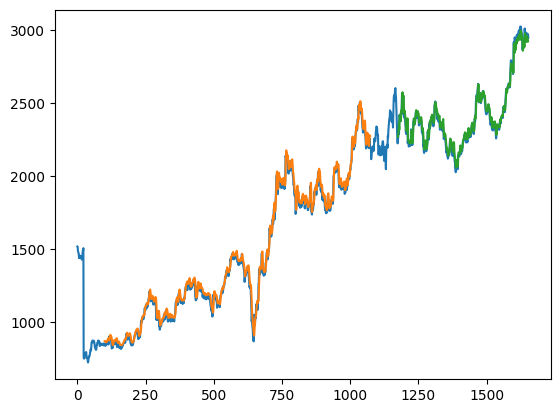

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [38]:
temp_len=len(test_data)-100

In [39]:
x_input=test_data[temp_len:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.7290597584979773,
 0.7295594043703261,
 0.7279952029824935,
 0.7336221392786223,
 0.7287338741565027,
 0.7271695858661787,
 0.7480696784173319,
 0.7461143723684839,
 0.760496778090144,
 0.7550436033248894,
 0.7614092107950273,
 0.7578027139647957,
 0.7567164328265469,
 0.7450280912302351,
 0.7611050520763177,
 0.7719461378360409,
 0.7869150484698643,
 0.8036872726956718,
 0.8144849506611106,
 0.8034700164680221,
 0.8069678417331833,
 0.8123340271048868,
 0.8151367193440601,
 0.8203508688076543,
 0.8218498933271922,
 0.8180261837205564,
 0.8218933011214765,
 0.8301925324689431,
 0.8196556054279295,
 0.8238703762443348,
 0.8293235075583442,
 0.818482421798621,
 0.8410336182286663,
 0.8697114402784355,
 0.8790534580673753,
 0.8991278900509682,
 0.8990627566339188,
 0.8901552513002785,
 0.8771198776412924,
 0.8818995146495873,
 0.8871353897359467,
 0.8741000160769609,
 0.8774457619827672,
 0.8584358420634127,
 0.8697331659012005,
 0.947945407855116,
 0.953572344151245,
 0.93249849006921

In [42]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9593462]
101
1 day input [0.7295594  0.7279952  0.73362214 0.72873387 0.72716959 0.74806968
 0.74611437 0.76049678 0.7550436  0.76140921 0.75780271 0.75671643
 0.74502809 0.76110505 0.77194614 0.78691505 0.80368727 0.81448495
 0.80347002 0.80696784 0.81233403 0.81513672 0.82035087 0.82184989
 0.81802618 0.8218933  0.83019253 0.81965561 0.82387038 0.82932351
 0.81848242 0.84103362 0.86971144 0.87905346 0.89912789 0.89906276
 0.89015525 0.87711988 0.88189951 0.88713539 0.87410002 0.87744576
 0.85843584 0.86973317 0.94794541 0.95357234 0.93249849 0.93936379
 0.96745497 0.96315334 0.94029799 0.94490382 0.95435447 0.96495657
 0.9554842  0.97088767 0.97471138 0.9754935  0.96893236 0.97132218
 0.96745502 0.9792303  0.97579766 0.98755122 0.98477034 0.98915891
 0.98140287 0.97097457 0.98878958 1.         0.99430789 0.99747983
 0.99178771 0.98257605 0.97892615 0.97442894 0.94462139 0.93119495
 0.93838613 0.93430172 0.94151462 0.95229053 0.95446309 0.94805404
 0.98918064 0.99411236 0.9842272  

8 day output [[0.92149395]]
9 day input [0.7550436  0.76140921 0.75780271 0.75671643 0.74502809 0.76110505
 0.77194614 0.78691505 0.80368727 0.81448495 0.80347002 0.80696784
 0.81233403 0.81513672 0.82035087 0.82184989 0.81802618 0.8218933
 0.83019253 0.81965561 0.82387038 0.82932351 0.81848242 0.84103362
 0.86971144 0.87905346 0.89912789 0.89906276 0.89015525 0.87711988
 0.88189951 0.88713539 0.87410002 0.87744576 0.85843584 0.86973317
 0.94794541 0.95357234 0.93249849 0.93936379 0.96745497 0.96315334
 0.94029799 0.94490382 0.95435447 0.96495657 0.9554842  0.97088767
 0.97471138 0.9754935  0.96893236 0.97132218 0.96745502 0.9792303
 0.97579766 0.98755122 0.98477034 0.98915891 0.98140287 0.97097457
 0.98878958 1.         0.99430789 0.99747983 0.99178771 0.98257605
 0.97892615 0.97442894 0.94462139 0.93119495 0.93838613 0.93430172
 0.94151462 0.95229053 0.95446309 0.94805404 0.98918064 0.99411236
 0.9842272  0.98396649 0.97484173 0.97121355 0.96380511 0.9807511
 0.9799907  0.97792677 0.

16 day output [[0.8931034]]
17 day input [0.80368727 0.81448495 0.80347002 0.80696784 0.81233403 0.81513672
 0.82035087 0.82184989 0.81802618 0.8218933  0.83019253 0.81965561
 0.82387038 0.82932351 0.81848242 0.84103362 0.86971144 0.87905346
 0.89912789 0.89906276 0.89015525 0.87711988 0.88189951 0.88713539
 0.87410002 0.87744576 0.85843584 0.86973317 0.94794541 0.95357234
 0.93249849 0.93936379 0.96745497 0.96315334 0.94029799 0.94490382
 0.95435447 0.96495657 0.9554842  0.97088767 0.97471138 0.9754935
 0.96893236 0.97132218 0.96745502 0.9792303  0.97579766 0.98755122
 0.98477034 0.98915891 0.98140287 0.97097457 0.98878958 1.
 0.99430789 0.99747983 0.99178771 0.98257605 0.97892615 0.97442894
 0.94462139 0.93119495 0.93838613 0.93430172 0.94151462 0.95229053
 0.95446309 0.94805404 0.98918064 0.99411236 0.9842272  0.98396649
 0.97484173 0.97121355 0.96380511 0.9807511  0.9799907  0.97792677
 0.97749225 0.9737989  0.96402237 0.97684049 0.96619493 0.95934618
 0.95146734 0.94470721 0.93931

24 day output [[0.87366617]]
25 day input [0.81802618 0.8218933  0.83019253 0.81965561 0.82387038 0.82932351
 0.81848242 0.84103362 0.86971144 0.87905346 0.89912789 0.89906276
 0.89015525 0.87711988 0.88189951 0.88713539 0.87410002 0.87744576
 0.85843584 0.86973317 0.94794541 0.95357234 0.93249849 0.93936379
 0.96745497 0.96315334 0.94029799 0.94490382 0.95435447 0.96495657
 0.9554842  0.97088767 0.97471138 0.9754935  0.96893236 0.97132218
 0.96745502 0.9792303  0.97579766 0.98755122 0.98477034 0.98915891
 0.98140287 0.97097457 0.98878958 1.         0.99430789 0.99747983
 0.99178771 0.98257605 0.97892615 0.97442894 0.94462139 0.93119495
 0.93838613 0.93430172 0.94151462 0.95229053 0.95446309 0.94805404
 0.98918064 0.99411236 0.9842272  0.98396649 0.97484173 0.97121355
 0.96380511 0.9807511  0.9799907  0.97792677 0.97749225 0.9737989
 0.96402237 0.97684049 0.96619493 0.95934618 0.95146734 0.94470721
 0.93931073 0.93507075 0.93154866 0.92829812 0.92499787 0.92149395
 0.91777718 0.91393  

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt


In [49]:
len_df1=len(df1)


In [50]:
scaler.inverse_transform(lst_output)


array([[2931.23806798],
       [2913.1054693 ],
       [2897.54752543],
       [2885.1278922 ],
       [2875.3698833 ],
       [2867.26402115],
       [2859.78313249],
       [2852.1878391 ],
       [2844.12381561],
       [2835.56993691],
       [2826.71591731],
       [2817.83007289],
       [2809.15959467],
       [2800.87458077],
       [2793.05445606],
       [2785.70498192],
       [2778.78500558],
       [2772.23705033],
       [2766.00528557],
       [2760.05130204],
       [2754.35274007],
       [2748.90205498],
       [2743.69979548],
       [2738.74925379],
       [2734.05152732],
       [2729.60428407],
       [2725.39970501],
       [2721.4279135 ],
       [2717.67601497],
       [2714.13029185]])

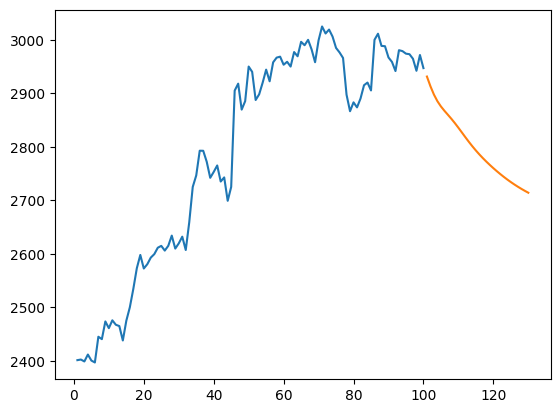

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[len_df1-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

In [61]:
# Save the scaler parameters
np.savez("scaler_parameters.npz", min_=scaler.min_, scale_=scaler.scale_)

In [62]:
import numpy as np

# Load the scaler parameters
data = np.load("scaler_parameters.npz")

# Extract the scaler parameters
min_ = data['min_']
scale_ = data['scale_']

print("Minimum value:", min_)
print("Scale value:", scale_)


Minimum value: [-0.31431327]
Scale value: [0.00043451]
